<a href="https://colab.research.google.com/github/andresvc21/Random_Practice_ML/blob/main/Homework_M8_Andres_Villegas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deploy Keras Model to the Cloud
1. Download data
2. Hot Encode Categorical Columns
3. Develop Model (use: ```RMSprop(lr=, rho=, epsilon=, decay=)```)
3. Create Storage Bucket (should already exist)
4. Authenticate on Google Cloud Platform
5. Deploy your model using the ```gcloud``` tool

In [1]:
!wget https://storage.googleapis.com/nicksdemobucket/bank.csv

--2022-03-21 01:36:25--  https://storage.googleapis.com/nicksdemobucket/bank.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4610348 (4.4M) [application/octet-stream]
Saving to: ‘bank.csv’

bank.csv            100%[===================>]   4.40M  19.3MB/s    in 0.2s    

2022-03-21 01:36:27 (19.3 MB/s) - ‘bank.csv’ saved [4610348/4610348]



In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('bank.csv', sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.loc[df['y'] == 'no', 'y'] = 0
df.loc[df['y'] == 'yes', 'y'] = 1
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [5]:
# Get all categorical columns
categorical = df.select_dtypes(include='object').columns
print(categorical)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [6]:
# Hot encode all categorical columns

In [7]:
# TODO - Process Data

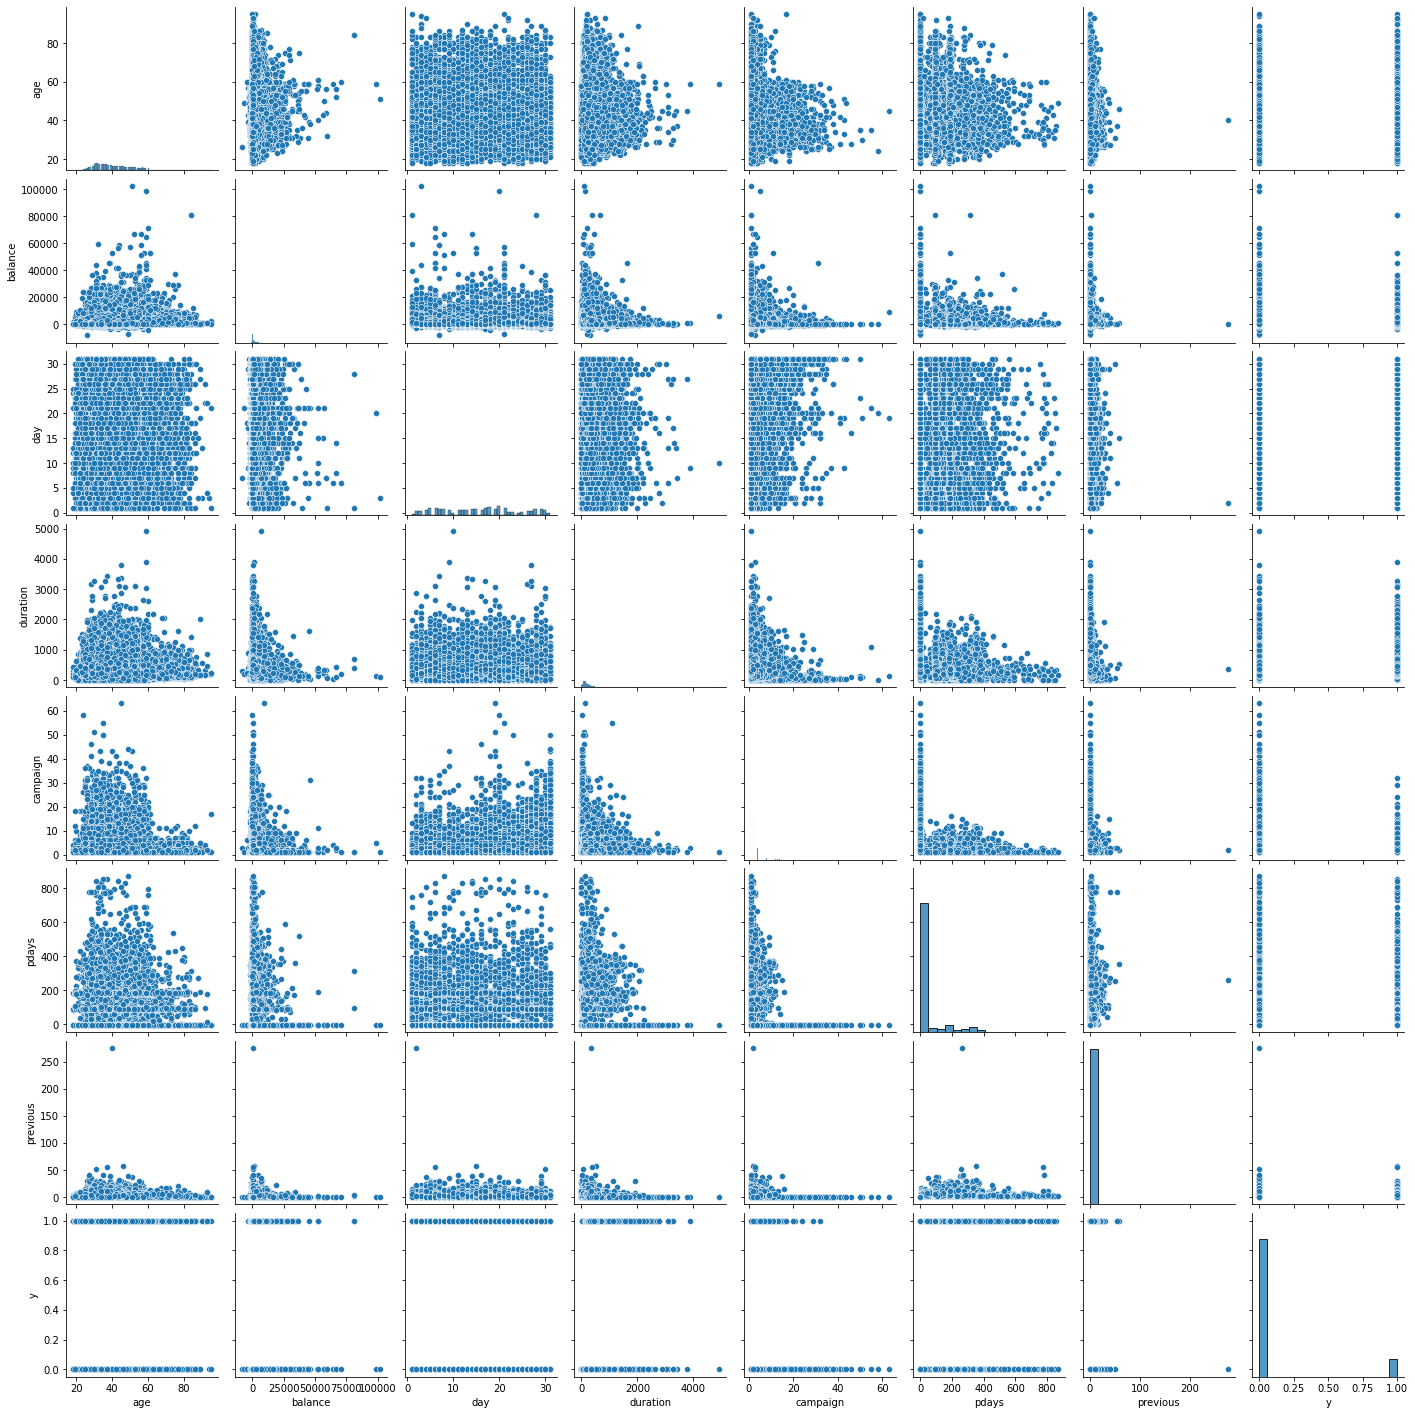

In [8]:
import seaborn as sns
sns.pairplot(df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']])


In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
df_new = df.drop(df.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 14]], axis =1)

In [15]:
df_new

,job,marital,default,balance,housing,poutcome,y
0,management,married,no,2143,yes,unknown,0
1,technician,single,no,29,yes,unknown,0
2,entrepreneur,married,no,2,yes,unknown,0
3,blue-collar,married,no,1506,yes,unknown,0
4,unknown,single,no,1,no,unknown,0
...,...,...,...,...,...,...,...
45206,technician,married,no,825,no,unknown,1
45207,retired,divorced,no,1729,no,unknown,1
45208,retired,married,no,5715,no,success,1
45209,blue-collar,married,no,668,no,unknown,0


In [16]:
data = pd.get_dummies(df_new, columns=['job','marital','default','housing','poutcome'],drop_first=False)

In [17]:
data.columns[[13,22,24]]

Index(['job_unknown', 'poutcome_other', 'poutcome_unknown'], dtype='object')

In [18]:
data = data.drop(data.columns[[13,22,24]],axis=1)

In [19]:
data

,balance,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,poutcome_failure,poutcome_success
0,2143,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,29,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,2,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,1506,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
45207,1729,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
45208,5715,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
45209,668,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [36]:
dataset = data.values
dataset

array([[2143, 0, 0, ..., 1, 0, 0],
       [29, 0, 0, ..., 1, 0, 0],
       [2, 0, 0, ..., 1, 0, 0],
       ...,
       [5715, 1, 0, ..., 0, 0, 1],
       [668, 0, 0, ..., 0, 0, 0],
       [2971, 0, 0, ..., 0, 0, 0]], dtype=object)

In [39]:
dataset.shape

(45211, 22)

In [54]:
X = dataset[:,0:21]
X = np.asarray(X).astype('float32')
X.shape


(45211, 21)

In [55]:
Y = dataset[:,21]
Y = np.asarray(Y).astype('float32')
Y.shape

(45211,)

In [56]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split
#Train and test set (30%)
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#validation test (50% of test set)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

In [58]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [63]:
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(21,)))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               2200      
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 12,401
Trainable params: 12,401
Non-trainable params: 0
_________________________________________________________________


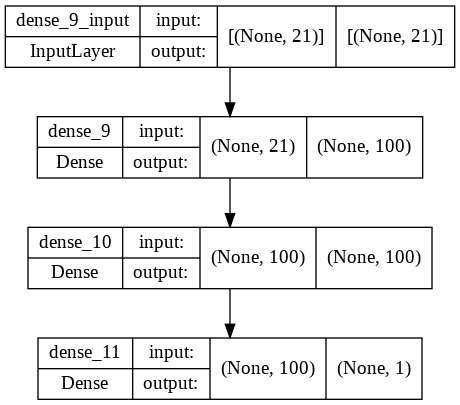

In [65]:
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

In [66]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
989/989 [==============================] - 3s 3ms/step - loss: 0.0312 - accuracy: 0.9658 - val_loss: 0.0250 - val_accuracy: 0.9712
Epoch 2/100
989/989 [==============================] - 2s 2ms/step - loss: 0.0290 - accuracy: 0.9658 - val_loss: 0.0259 - val_accuracy: 0.9712
Epoch 3/100
989/989 [==============================] - 2s 2ms/step - loss: 0.0290 - accuracy: 0.9658 - val_loss: 0.0251 - val_accuracy: 0.9712
Epoch 4/100
989/989 [==============================] - 3s 3ms/step - loss: 0.0289 - accuracy: 0.9658 - val_loss: 0.0251 - val_accuracy: 0.9712
Epoch 5/100
989/989 [==============================] - 2s 2ms/step - loss: 0.0289 - accuracy: 0.9658 - val_loss: 0.0256 - val_accuracy: 0.9712
Epoch 6/100
989/989 [==============================] - 2s 2ms/step - loss: 0.0288 - accuracy: 0.9658 - val_loss: 0.0259 - val_accuracy: 0.9712
Epoch 7/100
989/989 [==============================] - 2s 2ms/step - loss: 0.0288 - accuracy: 0.9658 - val_loss: 0.0250 - val_accuracy: 0.9712

In [10]:
# TODO -  Set project name, bucket name, authenticate to GCP

In [79]:
GCP_PROJECT = 'mcgilltest'
KERAS_MODEL_BUCKET = 'gs://bank-prediction'
BUCKET_NAME='bank-prediction'
REGION = 'us-central1'
KERAS_VERSION_NAME = 'v1'
MODEL = 'model_bank'

In [70]:
import sys
if 'google.colab' in sys.modules:
  from google.colab import auth as google_auth
  google_auth.authenticate_user()
else:
  %env GOOGLE_APPLICATION_CREDENTIALS ''

In [71]:
! gsutil mb -p $GCP_PROJECT -l $REGION $KERAS_MODEL_BUCKET
# Display what is in the bucket
!gsutil ls -al $KERAS_MODEL_BUCKET

Creating gs://bank-prediction/...
AccessDeniedException: 403 The billing account for the owning project is disabled in state absent
BucketNotFoundException: 404 gs://bank-prediction bucket does not exist.


In [76]:
!gsutil ls -al # list of buckets for the same project !

In [77]:
print("Display what is in the bucket :\n") 
# For first time would be empty and then will be filled  !!!!!!!
!gsutil ls -al gs://$BUCKET_NAME

Display what is in the bucket :



In [83]:
JOB_DIR = 'gs://' + BUCKET_NAME + '/Bank'

In [82]:
JOB_DIR

'gs://bank-prediction/alcoholEstimator'

In [84]:
export_path = tf.keras.models.save_model(model, JOB_DIR + '/keras_export')
print(type(export_path))
print("Model exported to: ", export_path)

InvalidArgumentError: ignored

In [85]:
MODEL_NAME = "Bank" # Model name  that TensorFlow serving is keep it up and running ~~~

In [86]:
! gcloud ai-platform models create alcoholModel

Please specify a region:
(For the global endpoint the region needs to be specified as 'global'.)
 [1] global
 [2] asia-east1
 [3] asia-northeast1
 [4] asia-southeast1
 [5] australia-southeast1
 [6] europe-west1
 [7] europe-west2
 [8] europe-west3
 [9] europe-west4
 [10] northamerica-northeast1
 [11] us-central1
 [12] us-east1
 [13] us-east4
 [14] us-west1
 [15] cancel
Please enter your numeric choice:  11

To make this the default region, run `gcloud config set ai_platform/region us-central1`.

Using endpoint [https://us-central1-ml.googleapis.com/]

API [ml.googleapis.com] not enabled on project [706493220718]. Would you like to
 enable and retry (this will take a few minutes)? (y/N)?  
ERROR: (gcloud.ai-platform.models.create) User [iaeroespacial@gmail.com] does not have permission to access projects instance [mcgilltest] (or it may not exist): AI Platform Training & Prediction API has not been used in project 706493220718 before or it is disabled. Enable it by visiting https://conso

In [87]:
MODEL_VERSION = "v1"

# Get a list of directories in the `keras_export` parent directory
KERAS_EXPORT_DIRS = ! gsutil ls $JOB_DIR/keras_export/
print("! gsutil ls $JOB_DIR/keras_export/ \n")
print(KERAS_EXPORT_DIRS)
print("-------------------------")
# Pick the directory with the latest timestamp, in case you've trained
# multiple times
SAVED_MODEL_PATH = KERAS_EXPORT_DIRS[0]
print("Saved_model_path \n")
print(SAVED_MODEL_PATH)
print("----------------")
# Create model version based on that SavedModel directory
! gcloud ai-platform versions create $MODEL_VERSION \
  --model $MODEL_NAME \
  --runtime-version 2.2 \
  --python-version 3.7 \
  --framework tensorflow \
  --origin $SAVED_MODEL_PATH

! gsutil ls $JOB_DIR/keras_export/ 

['BucketNotFoundException: 404 gs://bank-prediction bucket does not exist.']
-------------------------
Saved_model_path 

BucketNotFoundException: 404 gs://bank-prediction bucket does not exist.
----------------
ERROR: (gcloud.ai-platform.versions.create) unrecognized arguments:
  404
  gs://bank-prediction
  bucket
  does
  not
  exist.
  To search the help text of gcloud commands, run:
  gcloud help -- SEARCH_TERMS
